In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from pandas_ml import ConfusionMatrix


c:\program files\python36\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\program files\python36\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


# Define Functions

In [2]:
def plot_scatter(X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend();

In [3]:
def plot_withline(X,y,model):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [4]:
class LogisticRegression_hand:
    def __init__(self, X, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()


In [5]:
def plot_ROC_pyplot(preds, y):
    fpr, tpr, _ = metrics.roc_curve(y, preds)
    
    plt.figure()
    ##Adding the ROC
    plt.plot(fpr, tpr, color='red',
     lw=2, label='ROC curve')
    ##Random FPR and TPR
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print("AUC = ",metrics.auc(fpr, tpr))

In [6]:
def plot_ROC_ggplot(preds, y):
    fpr, tpr, _ = metrics.roc_curve(y, preds)

    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    g = ggplot(df, aes(x='fpr', y='tpr')) +\
     geom_line() +\
     geom_abline(linetype='dashed')
    print(g)

In [7]:
def print_CM(preds, y):
    cm = metrics.confusion_matrix(y, preds)
    print(cm)
    
    confusion_matrix = ConfusionMatrix(y,preds)
    confusion_matrix.plot(normalized=True)

# Load Iris Data Set, define Input, Ouput

In [8]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) * 1

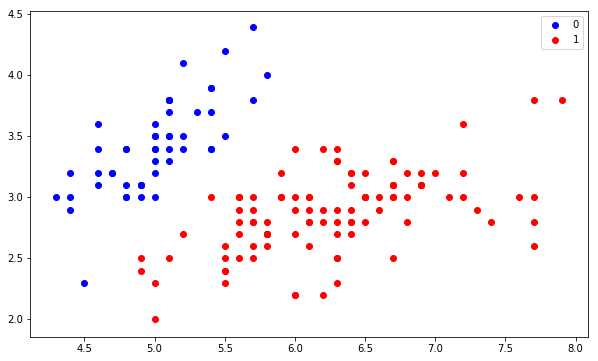

In [9]:
plot_scatter(X,y)

# Define Model

In [24]:
model = LogisticRegression_hand(X, lr=0.1, num_iter=300000, fit_intercept=True, verbose=False)
#%time model.fit(X, y)

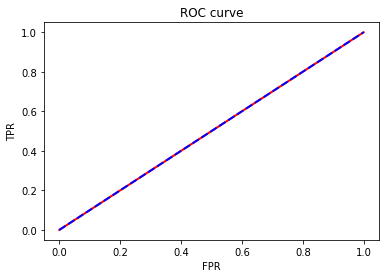

AUC =  0.5


In [26]:
preds2 = model.predict_prob(X)
plot_ROC_pyplot(preds2, y)

# Accuracy of Model

In [11]:
preds = model.predict(X)
print("Accuracy: ",(preds == y).mean())
model.theta

Accuracy:  1.0


array([-25.96818124,  12.56179068, -13.44549335])

# Visualization of Results

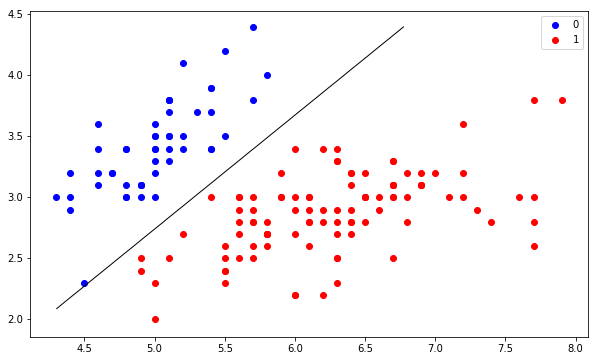

In [12]:
plot_withline(X,y,model)

[[ 50   0]
 [  0 100]]


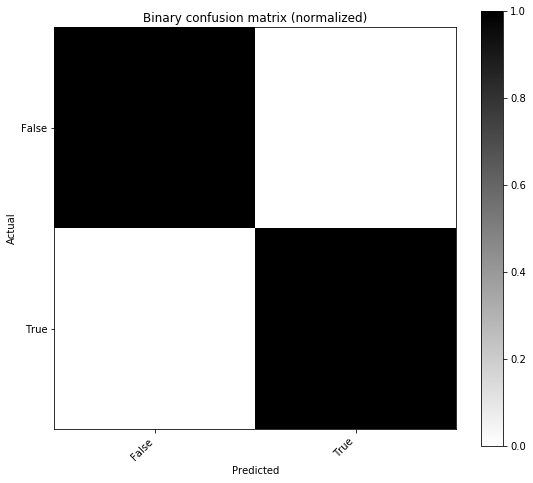

In [13]:
print_CM(preds, y)

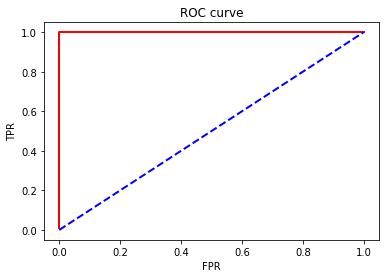

AUC =  1.0


In [14]:
preds2 = model.predict_prob(X)
plot_ROC_pyplot(preds2, y)

# Redefine Problem (choose different Iris class)

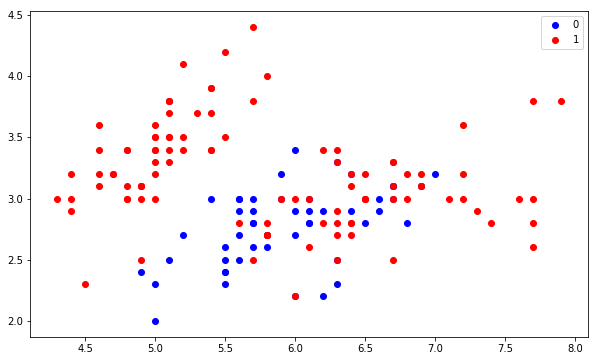

In [15]:
y = (iris.target != 1) * 1
plot_scatter(X,y)

In [16]:
model = LogisticRegression_hand(X, lr=0.1, num_iter=300000)
%time model.fit(X, y)

preds = model.predict(X)
print("Accuracy: ",(preds == y).mean())

model.theta

Wall time: 24.6 s
Accuracy:  0.7133333333333334


array([-8.025147  , -0.14035595,  3.21420697])

# Visualize Results

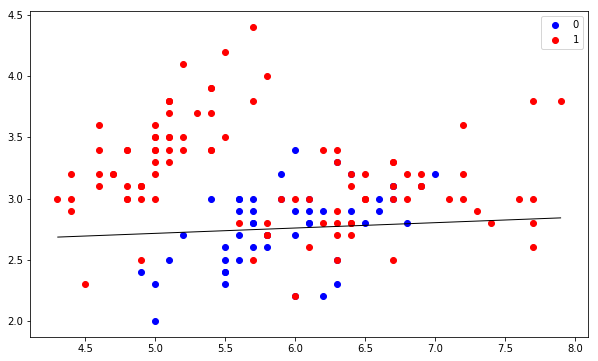

In [17]:
plot_withline(X,y,model)

# Now use Sci-Kit Learn's Logistic Regression model

In [18]:
model = LogisticRegression(C=1e20)
%time model.fit(X, y)

Wall time: 1e+03 µs


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
print("Score: ",model.score(X, y))
preds = model.predict(X)
print("Accuracy: ",(preds == y).mean())
model.intercept_, model.coef_

Score:  0.7133333333333334
Accuracy:  0.7133333333333334


(array([-8.02448467]), array([[-0.14038305,  3.21403399]]))

[[21 29]
 [14 86]]


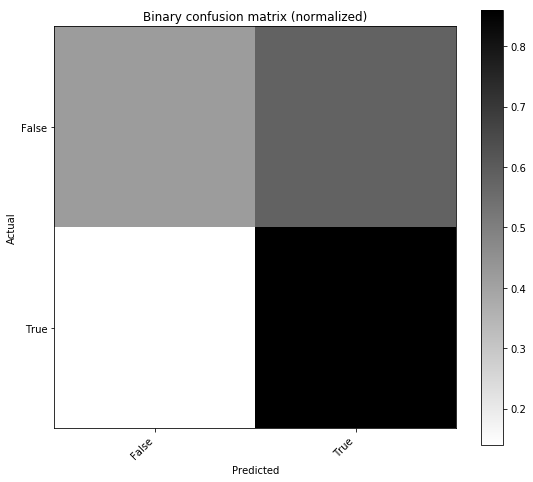

In [20]:
print_CM(preds, y)

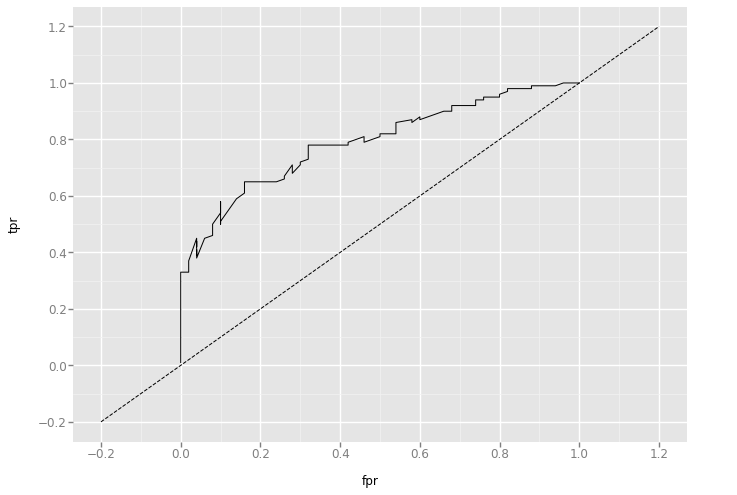

<ggplot: (114417657636)>


In [21]:
preds2 = model.predict_proba(X)[:,1]
plot_ROC_ggplot(preds2, y)

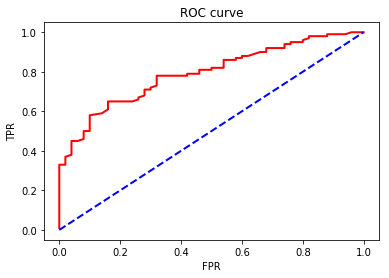

AUC =  0.7921


In [22]:
plot_ROC_pyplot(preds2, y)

Wall time: 1.98 ms
Score:  1.0
Accuracy:  1.0
[[ 50   0]
 [  0 100]]


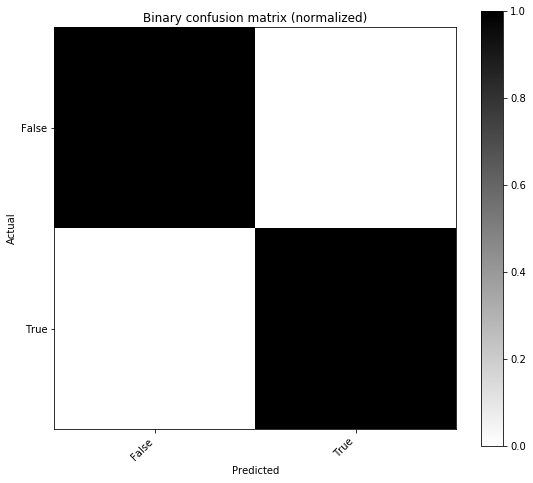

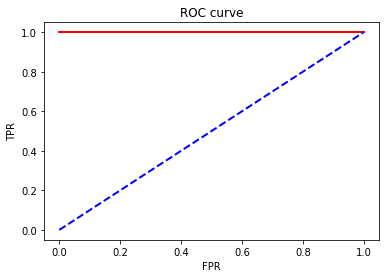

AUC =  1.0


In [23]:
y = (iris.target != 0) * 1
model = LogisticRegression(C=1e20)
%time model.fit(X, y)

print("Score: ",model.score(X, y))
preds = model.predict(X)
print("Accuracy: ",(preds == y).mean())
print_CM(preds, y)

preds2 = model.predict_proba(X)[:,1]
plot_ROC_pyplot(preds, y)